### 1. Importing important libraries

In [28]:
import numpy as np
import PyPDF2
import docx2txt
import sys

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [30]:
import networkx as nx

In [31]:
from nltk.tokenize.punkt import PunktSentenceTokenizer

In [32]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

### 2.  Function to read the document from user

In [33]:
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
    print(choice)
        
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

### 3. Function to tokenize the document

In [34]:
def tokenize(document):
    doc_tokenizer = PunktSentenceTokenizer()
    
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

### 4. Read the document

In [ ]:
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

### 5. Generate a list of sentences in the document

In [36]:
sentences_list = tokenize(document)

print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 2048
The size of the item 0 in Bytes is: 158


In [37]:
print(type(sentences_list))

<class 'list'>


In [38]:
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

The size of the list "sentences" is: 249


In [39]:
for i in sentences_list:
    print(i)

Abstract-Text Summarization is the process of obtaining 
salient information from an authentic text document.
In this 
technique, the extracted information is achieved as a summarized 
report and conferred as a concise summary to the user.
It is very 
crucial for humans to understand and to describe the content 
of the text.
Text Summarization techniques are classified into 
abstractive and extractive summarization.
The extractive summarization technique focuses on choosing how paragraphs,important 
sentences, etc produces the original documents in precise form.
The implication of sentences is determined based on linguistic 
and statistical features.
In this work, a comprehensive review 
of extractive text summarization process methods has been 
ascertained.
In this paper, the various techniques, populous 
benchmarking datasets and challenges of extractive summarization have been reviewed.
This paper interprets extractive text 
summarization methods with a less redundant summary, hig

### 6. Generate term-document matrix (TD matrix) of the data 

In [40]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [42]:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse.csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <249x1214 sparse matrix of type '<class 'numpy.int64'>'
	with 3439 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 48
['02', '09', '0906', '10', '11', '12', '1290', '1293', '13', '14', '142', '146', '15', '16', '17', '18', '19', '1998', '1999', '20', '2001', '2002', '2004', '2005', '2007', '2008', '2009', '2010', '2011', '2014', '2015', '2016', '205', '21', '215', '22', '23', '24th', '25', '258', '268', '2862', '2867', '299', '305', '347', '352', '37', '405', '417', '443', '448', '457', '46', '461', '4690', '479', '489', '49', '493', '50', '52', '604', '632', 'able', 'abounding', 'about', 'abstract', 'abstractive', 'accomplishes', 'accuracy', 'achieved', 'acl', 'acm', 'adhesive', 'adjectives', 'adopt', 'adopting', 'advance', 'advances', 'advantage', 'adverbs', 'advertisements', 'after', 'against', 'age', 'agreement', 'aim', 'al', 'alagamrnai

In [43]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T

<bound method _cs_matrix.toarray of <1214x249 sparse matrix of type '<class 'numpy.float64'>'
	with 3439 stored elements in Compressed Sparse Column format>>


Number of edges 14582
Number of vertices 249


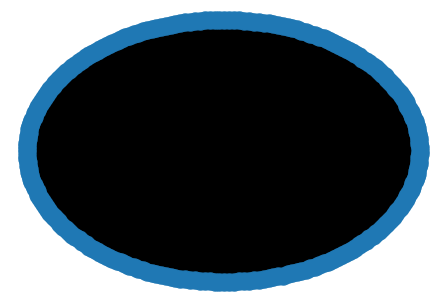

The memory used by the graph in Bytes is: 48


In [45]:
nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

### 8. Getting the rank of every sentence using textrank

In [46]:
ranks = nx.pagerank(nx_graph)

print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

for i in ranks:
    print(i, ranks[i])


<class 'dict'>
The size used by the dictionary in Bytes is: 9312
0 0.005152606645907651
1 0.005288835343110857
2 0.006407700687137224
3 0.00469333418315987
4 0.004385547417880532
5 0.005566537955541965
6 0.004365163828970424
7 0.004064091378643071
8 0.0038459988517411487
9 0.0053909069002482215
10 0.0035905078642940054
11 0.0041665652321846635
12 0.0022503715974677386
13 0.004505889805955317
14 0.0032153440625236613
15 0.004024489385087385
16 0.002838916069346994
17 0.0033059840783119326
18 0.0051485039919525084
19 0.0056320639439613705
20 0.004473717295651369
21 0.004468558982911423
22 0.004188450186808081
23 0.006089778188029934
24 0.0036863336869304352
25 0.0025806391641432372
26 0.004302363276815619
27 0.0019966692842818892
28 0.005649373057655497
29 0.004381730718598641
30 0.0055485378341249385
31 0.005233508640862229
32 0.005820365042434312
33 0.0043650752723679714
34 0.007260569678591901
35 0.0054399382323156616
36 0.003420193812597015
37 0.002207637129536699
38 0.00514205457050

### 9. Finding important sentences and generating summary

In [47]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [48]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [49]:
print(rank_max)
print(rank_min)

0.008697423678251248
0.0006303845345660854


In [50]:
temp_array = []

flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))


249


In [51]:
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [52]:
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [53]:
model = sentence_list

### 10. Writing the summary to a new file

In [56]:
summary = " ".join(str(x) for x in sentence_list)
print(summary)
f = open('sum.txt', 'a+')
f.write('\n')
f.write(summary)
f.close


The normalized length of the sentence is calculated 
as the ratio between a number of words in the sentence to the 
number of words in the longest sentence in the document. P (s E< SII1,h,h, .... In) 
represents the probability of the sentences to be included in 
the summary based on the given features possessed by the 
sentence. The probability of classification are learned from the 
training data by the following Bayes rule [16]: where s represents the set of sentences in the document and fi represents 
the features used in classification stage and S represents the 
set of sentences in the summary. SENTENCE LEVEL FEATURES 
2.1 Sentence location feature 
The sentences that occur in the beginning and the conclusion 
part of the document are most likely important since most 
documents are hierarchically structured with important information in the beginning and the end of the paragraphs. The sentences are restricted as a non-summary 
and summary sentence based on the feature possessed

<function TextIOWrapper.close()>

In [57]:
for lines in sentence_list:
    print(lines)

The normalized length of the sentence is calculated 
as the ratio between a number of words in the sentence to the 
number of words in the longest sentence in the document.
P (s E< SII1,h,h, .... In) 
represents the probability of the sentences to be included in 
the summary based on the given features possessed by the 
sentence.
The probability of classification are learned from the 
training data by the following Bayes rule [16]: where s represents the set of sentences in the document and fi represents 
the features used in classification stage and S represents the 
set of sentences in the summary.
SENTENCE LEVEL FEATURES 
2.1 Sentence location feature 
The sentences that occur in the beginning and the conclusion 
part of the document are most likely important since most 
documents are hierarchically structured with important information in the beginning and the end of the paragraphs.
The sentences are restricted as a non-summary 
and summary sentence based on the feature possessed